In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
train_data = pd.read_csv("C:\\Users\\TEST\\Downloads\\train (1).csv")
test_data = pd.read_csv("C:\\Users\\TEST\\Downloads\\test (2).csv")

In [93]:
train_data.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,6.105308,1521.516267,1.774829,476.279966,1056.785103,1165.665240,1.570205,6.529110,1971.017979,1984.710616,181223.591610
std,1.363010,524.016060,0.741579,212.528801,444.811593,388.045378,0.543122,1.584796,30.373491,20.701291,79883.397794
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,34900.000000
25%,5.000000,1137.250000,1.000000,336.000000,793.750000,884.750000,1.000000,5.000000,1953.000000,1966.000000,130000.000000
50%,6.000000,1468.500000,2.000000,480.000000,990.000000,1088.000000,2.000000,6.000000,1973.000000,1993.500000,164250.000000
75%,7.000000,1787.250000,2.000000,576.000000,1298.250000,1392.000000,2.000000,7.000000,2000.000000,2003.000000,214000.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,12.000000,2009.000000,2010.000000,755000.000000


In [94]:
train_data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000


In [95]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1168 non-null   int64
 1   GrLivArea     1168 non-null   int64
 2   GarageCars    1168 non-null   int64
 3   GarageArea    1168 non-null   int64
 4   TotalBsmtSF   1168 non-null   int64
 5   1stFlrSF      1168 non-null   int64
 6   FullBath      1168 non-null   int64
 7   TotRmsAbvGrd  1168 non-null   int64
 8   YearBuilt     1168 non-null   int64
 9   YearRemodAdd  1168 non-null   int64
 10  SalePrice     1168 non-null   int64
dtypes: int64(11)
memory usage: 100.5 KB


<Axes: >

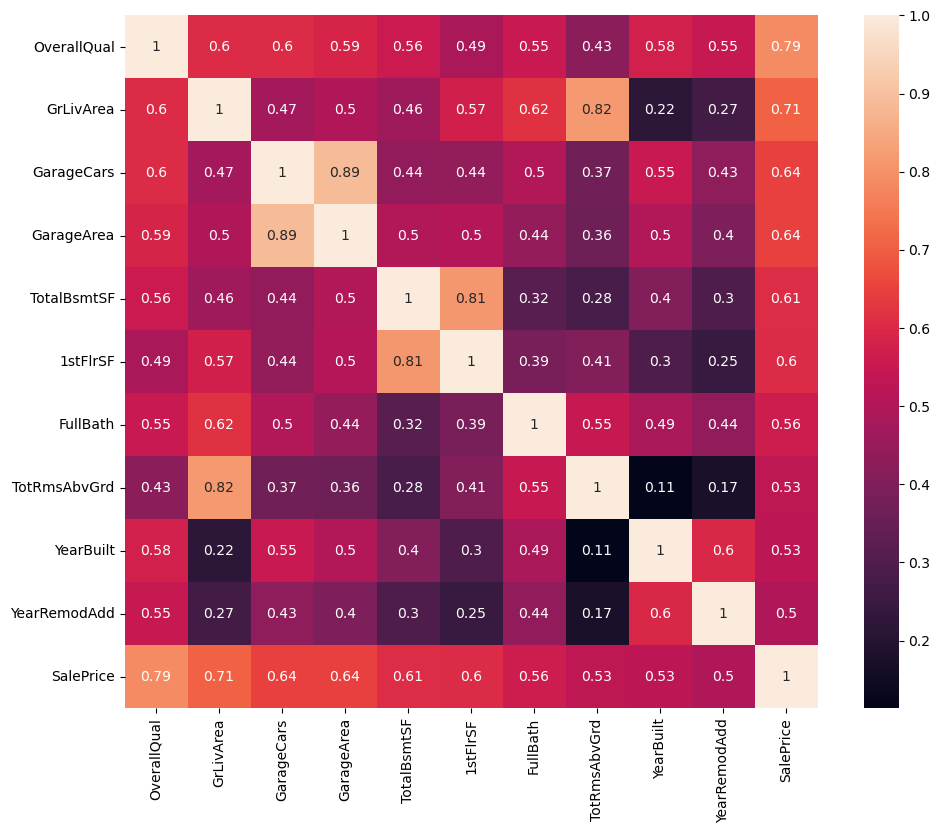

In [96]:
corr_matrix = train_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, square=True, annot=True)

* SalePrice has the highest correlation with OverallQual.
* GarageArea and GarageCars have high correlation and they also have similar correlation with SalesPrice so we can keep either one of them.
* TotalBsmtSF and 1stFlrSF have high correlation and TotalBsmtSF has a greater correlation with SalePrice than 1stFlrSF- Retaining TotalBsmtSF and removing 1stFlrSF.



In [97]:
# Dropping columns 
train_data = train_data.drop(columns=['GarageArea', '1stFlrSF'])
test_data = test_data.drop(columns=['GarageArea','1stFlrSF'])



In [98]:
#Separating the independent and dependent features
#Dependent features
y_train = np.asarray(train_data['SalePrice'].values.tolist()) 
y_test = np.asarray(test_data['SalePrice'].values.tolist())

# Independent Features
# Now, our dataset has only independent features
train_data = train_data.drop(columns=["SalePrice"])
test_data = test_data.drop(columns=["SalePrice"])


In [78]:
train_data

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1820,1,1026,2,8,1925,1950
1,7,1646,1,918,2,7,1941,1950
2,5,1316,2,926,1,6,1929,2001
3,10,2402,3,3094,2,10,2008,2008
4,7,1253,2,1237,2,6,1995,1996
...,...,...,...,...,...,...,...,...
1163,6,1400,2,672,1,6,1978,1978
1164,7,1472,2,384,2,7,1991,1992
1165,5,789,1,789,1,5,1948,1950
1166,6,1661,1,992,1,8,1955,1996


In [99]:
# Get the processed Independent features 
X_train = np.asarray(train_data.values.tolist())

#Get the shapes of X and y
print("The shape of the independent fatures are ",X_train.shape)
print("The shape of the dependent fatures are ",y_train.shape)

The shape of the independent fatures are  (1168, 8)
The shape of the dependent fatures are  (1168,)


In [100]:
#Reshaping the Dependent features
y_train = y_train.reshape(len(y),1) # Changing the shape from (1168,) to (1168,1)

In [102]:
X_test = np.asarray(test_data.values.tolist())



print("The shape of the independent fatures are ",X_test.shape)
print("The shape of the dependent fatures are ",y_test.shape)


The shape of the independent fatures are  (292, 8)
The shape of the dependent fatures are  (292,)


In [ ]:
#Reshaping the Dependent features
y_test = y_test.reshape(len(y_test),1) # Changing the shape from (292,) to (292,1)
print("The shape of the dependent features are ",y_test.shape)

In [ ]:
X_train = np.vstack((np.ones((X_train.shape[0], )), X_train.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [ ]:
def model(X_train, y_train, learning_rate, iteration):
    m = y_train.size
    theta = np.zeros((X_train.shape[1], 1))
    cost_list = []
    
    for i in range(iteration):
        y_pred = np.dot(X_train, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - y_train))
        d_theta = (1/m)*np.dot(X_train.T, y_pred - y_train)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        # to print the cost for 10 times
        if(i%(iteration/10) == 0):
            print("Cost is: ",cost)
            
    return theta, cost_list

In [ ]:
iteration = 100000
learning_rate = 0.0000001
theta, cost_list = model(X_train, y_train, learning_rate = learning_rate, iteration = iteration)



In [ ]:
plt.scatter(X_train[:, 1], y, label='Actual Data')
plt.plot(X_train[:, 1], y_pred, color='red', label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target Variable')
plt.legend()
plt.show()